### **Problem Statement**
The dataset contains sales data from a superstore, including details about orders, customers, products, and financial metrics like sales, profit, and shipping costs. The goal is to analyze this data to uncover patterns and relationships that can help optimize business operations and improve profitability.

### **Objective of Regression Analysis**
The primary objective of this regression analysis is to predict **Profit** based on other features in the dataset. By building a regression model, we aim to:
1. **Understand Key Drivers of Profit**: Identify which factors (e.g., sales, discount, shipping cost, etc.) have the most significant impact on profit.
2. **Optimize Business Decisions**: Provide actionable insights to improve profitability by adjusting discounts, shipping strategies, or product focus.
3. **Forecast Profitability**: Use the model to predict future profits for new orders or scenarios.

### **Steps to Achieve the Objective**
1. **Data Cleaning**: Handle missing values, duplicates, and outliers.
2. **Feature Engineering**: Select and preprocess relevant features for the regression model.
3. **Exploratory Data Analysis (EDA)**: Visualize relationships between features and profit.
4. **Model Building**: Train a regression model to predict profit.
5. **Model Evaluation**: Assess the model's performance using metrics like R² and Mean Squared Error (MSE).
6. **Insights and Recommendations**: Interpret the results to provide actionable insights.

In [2]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set a consistent style for plots
sns.set(style="whitegrid")

## Load and Inspect the Dataset

In [3]:
#Load and Inspect the Dataset

# Load the dataset
file_path = "SuperStoreOrders.csv"  # Update the path if necessary
data = pd.read_csv(file_path,  encoding='latin1')

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
display(data.head())

First 5 rows of the dataset:


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011


In [4]:
# Display basic information about the dataset
print("\nDataset Information:")
data.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 643 entries, 0 to 642
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        643 non-null    object 
 1   order_date      643 non-null    object 
 2   ship_date       643 non-null    object 
 3   ship_mode       643 non-null    object 
 4   customer_name   643 non-null    object 
 5   segment         643 non-null    object 
 6   state           643 non-null    object 
 7   country         643 non-null    object 
 8   market          643 non-null    object 
 9   region          643 non-null    object 
 10  product_id      643 non-null    object 
 11  category        643 non-null    object 
 12  sub_category    643 non-null    object 
 13  product_name    643 non-null    object 
 14  sales           643 non-null    float64
 15  quantity        643 non-null    int64  
 16  discount        643 non-null    float64
 17  profit       

In [5]:

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64


## data cleaning and preprocessing

In [6]:
# Convert 'order_date' and 'ship_date' columns to datetime format with error handling
data['order_date'] = pd.to_datetime(data['order_date'], format='%Y-%m-%d', errors='coerce')
data['ship_date'] = pd.to_datetime(data['ship_date'], format='%Y-%m-%d', errors='coerce')

# Check for rows with invalid dates
invalid_dates = data[data['order_date'].isna() | data['ship_date'].isna()]
print("Rows with invalid dates:")
display(invalid_dates)

# Drop rows with invalid dates
data = data.dropna(subset=['order_date', 'ship_date'])

# Create a new feature: shipping duration (in days)
data['shipping_duration'] = (data['ship_date'] - data['order_date']).dt.days

# Display the cleaned dataset
print("\nCleaned Dataset:")
display(data.head())

Rows with invalid dates:


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year



Cleaned Dataset:


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,shipping_duration
0,AG-2011-2040,2011-01-01,2011-06-01,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.0,2,0.0,106.140,35.46,Medium,2011,151
1,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.0,3,0.1,36.036,9.72,Medium,2011,212
2,HU-2011-1220,2011-01-01,2011-05-01,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.0,4,0.0,29.640,8.17,High,2011,120
3,IT-2011-3647632,2011-01-01,2011-05-01,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",45.0,3,0.5,-26.055,4.82,High,2011,120
4,IN-2011-47883,2011-01-01,2011-08-01,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",114.0,5,0.1,37.770,4.70,Medium,2011,212


# exploratory data analysis (EDA)

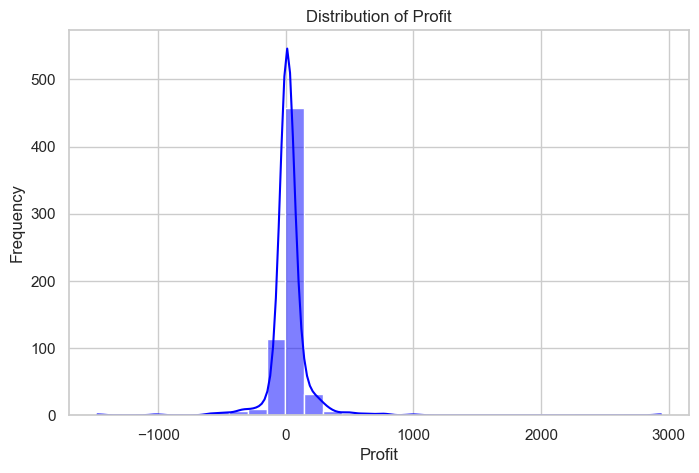

In [7]:
# 1. Distribution of Profit
plt.figure(figsize=(8, 5))
sns.histplot(data['profit'], kde=True, color='blue', bins=30)
plt.title('Distribution of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

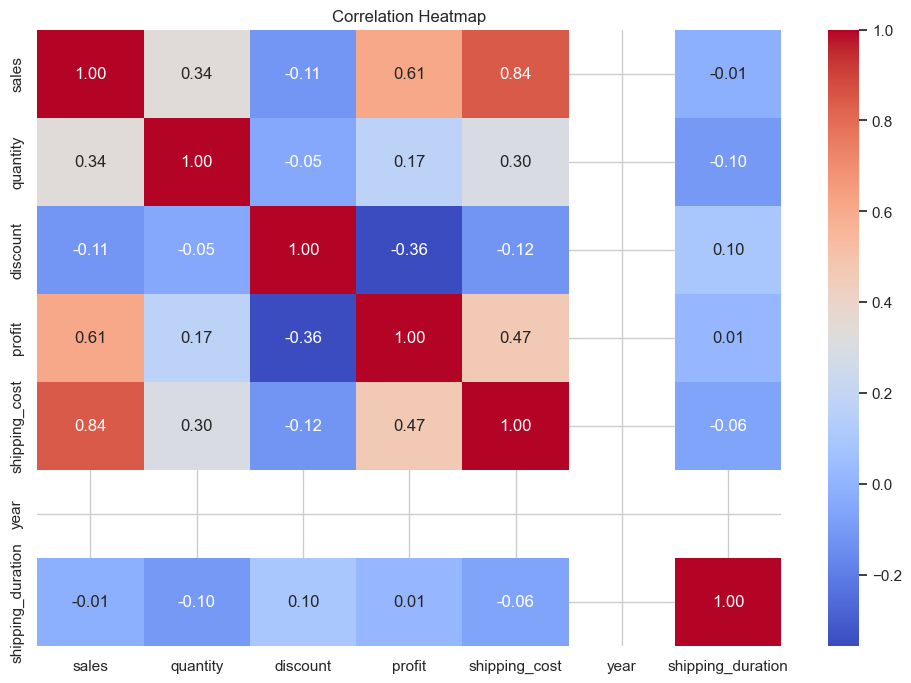

In [8]:
# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

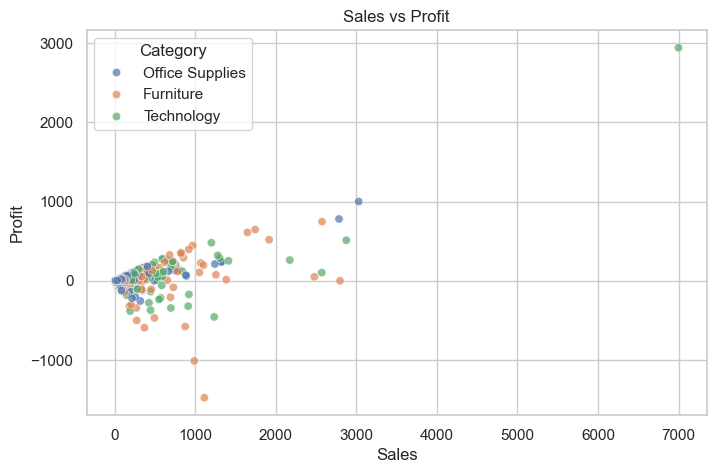

In [9]:
# 3. Relationship between Sales and Profit
plt.figure(figsize=(8, 5))
sns.scatterplot(x='sales', y='profit', data=data, hue='category', alpha=0.7)
plt.title('Sales vs Profit')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()

C:\Temp\ipykernel_24480\4025707326.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='category', y='profit', data=data, errorbar=None, palette='viridis', hue=None, legend=False)


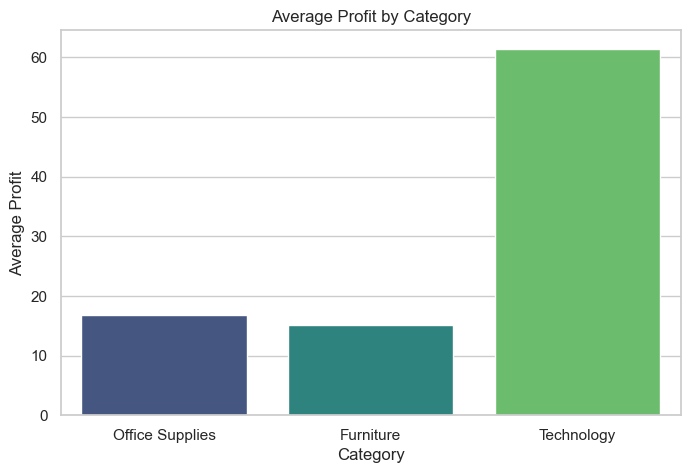

In [10]:
# 4. Average Profit by Category
plt.figure(figsize=(8, 5))
sns.barplot(x='category', y='profit', data=data, errorbar=None, palette='viridis', hue=None, legend=False)
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.show()

C:\Temp\ipykernel_24480\2841715103.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='discount_range', y='profit', data=data, palette='viridis')


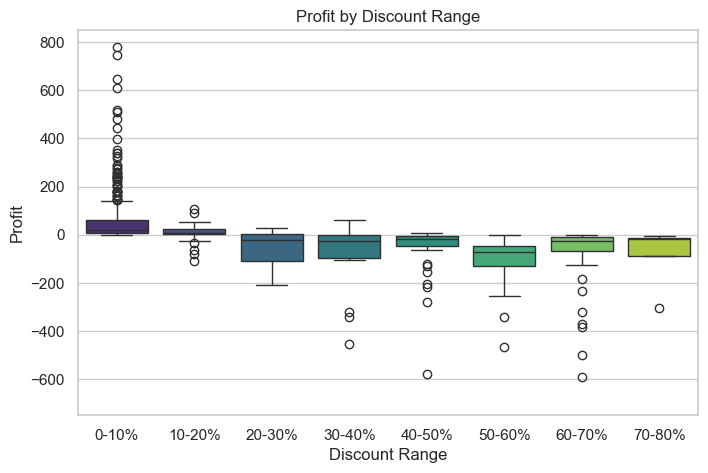

In [11]:
# Create discount bins for better visualization
bins = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]  # Define discount ranges
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%']  # Labels for the bins
data['discount_range'] = pd.cut(data['discount'], bins=bins, labels=labels, include_lowest=True)

# Plot Profit by Discount Range with limited y-axis values
plt.figure(figsize=(8, 5))
sns.boxplot(x='discount_range', y='profit', data=data, palette='viridis')
plt.title('Profit by Discount Range')
plt.xlabel('Discount Range')
plt.ylabel('Profit')

# Limit y-axis values to exclude extreme values
plt.ylim(-750, 850)  # Set y-axis range from -1000 to 1000
plt.show()

# **4 Essential Insights with Actionable Recommendations**

## **1. High Discounts Severely Erode Profitability**
**Insight:** Discounts above 50% consistently result in negative profit, while the 0-10% discount range yields the highest profit margins with many positive outliers.

**Actionable Recommendations:**
- Implement a discount ceiling of 40% across all product categories
- Develop alternative promotion strategies that don't rely on deep discounts (e.g., bundle offers, loyalty rewards)
- Require manager approval for any discounts exceeding 40%
- Train sales team on the profit impact of excessive discounting

## **2. Technology Category Outperforms Others**
**Insight:** Technology has significantly higher average profit than Furniture and Office Supplies, suggesting higher margins or better sales mix.

**Actionable Recommendations:**
- Allocate more marketing budget and floor space to Technology products
- Cross-sell Technology items with Furniture and Office Supplies purchases
- Analyze successful Technology products to identify attributes that could be applied to other categories
- Consider expanding the Technology product range

## **3. Sales Value Strongly Drives Profit**
**Insight:** Sales and profit have a strong positive correlation (0.61), indicating that higher-value transactions generally lead to better profitability.

**Actionable Recommendations:**
- Focus on upselling and increasing average transaction value
- Create sales incentives tied to average order value rather than just order volume
- Develop premium product lines across all categories
- Bundle complementary products to increase transaction size

## **4. Shipping Costs Influence Profitability**
**Insight:** Shipping costs correlate moderately with profit (0.47), suggesting that customers purchasing profitable items are willing to pay for shipping.

**Actionable Recommendations:**
- Implement tiered shipping options with premium services for high-value orders
- Offer free shipping only on orders above a profitable threshold
- Optimize warehouse locations to reduce shipping costs for high-volume regions
- Consider implementing minimum order values to ensure shipping costs don't erode margins

These four insights address the core factors influencing profitability across the business and provide concrete actions that can be implemented immediately.

# Feature engineering and model building

In [20]:
# Step 1: Feature Engineering
print("Feature Engineering...")

# Create profit margin feature (profit as percentage of sales)
data['profit_margin'] = data['profit'] / data['sales'] * 100
# Create sales per item feature
data['sales_per_item'] = data['sales'] / data['quantity']
# Create discount amount feature
data['discount_amount'] = data['sales'] * data['discount']

# Convert any categorical variables to dummy variables if not done already
# Drop non-numeric columns or columns not needed for modeling
X = data.drop(['profit', 'profit_margin'], axis=1)  # Remove profit (target) and derived features
y = data['profit']  # Our target variable

# Option 2: If some string columns are important categories, encode them properly
X = pd.get_dummies(X, drop_first=True)  # One-hot encode string columns

# After the get_dummies line but before train_test_split, add:

# Identify datetime columns
datetime_columns = X.select_dtypes(include=['datetime64[ns]']).columns
print(f"Datetime columns found: {list(datetime_columns)}")

if len(datetime_columns) > 0:
    # Extract useful features from datetime columns
    for col in datetime_columns:
        # Extract numerical features from datetime
        X[f'{col}_year'] = X[col].dt.year
        X[f'{col}_month'] = X[col].dt.month
        X[f'{col}_day'] = X[col].dt.day
        X[f'{col}_dayofweek'] = X[col].dt.dayofweek
        
        # Drop the original datetime column
        X = X.drop(col, axis=1)

# Check data types after transformation
print("Data types after transformation:")
print(X.dtypes.value_counts())

# Make sure all columns are numeric
for col in X.columns:
    if not np.issubdtype(X[col].dtype, np.number):
        print(f"Converting non-numeric column: {col}, type: {X[col].dtype}")
        X[col] = pd.to_numeric(X[col], errors='coerce')
        
X = X.fillna(0)  # Fill any NaNs created during conversion


# Step 2: Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

# Step 3: Build and train multiple regression models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

Feature Engineering...
Datetime columns found: ['order_date', 'ship_date']
Data types after transformation:
bool       2061
int32         8
float64       5
int64         3
Name: count, dtype: int64
Converting non-numeric column: order_id_AG-2011-2040, type: bool
Converting non-numeric column: order_id_AG-2011-7230, type: bool
Converting non-numeric column: order_id_AO-2011-1390, type: bool
Converting non-numeric column: order_id_AO-2011-1670, type: bool
Converting non-numeric column: order_id_AO-2011-1710, type: bool
Converting non-numeric column: order_id_AO-2011-4910, type: bool
Converting non-numeric column: order_id_AO-2011-8430, type: bool
Converting non-numeric column: order_id_BN-2011-1530, type: bool
Converting non-numeric column: order_id_CA-2011-100328, type: bool
Converting non-numeric column: order_id_CA-2011-102645, type: bool
Converting non-numeric column: order_id_CA-2011-103366, type: bool
Converting non-numeric column: order_id_CA-2011-103800, type: bool
Converting non

In [21]:
# Step 4: Evaluate models
print("\nModel Evaluation:")
print("Linear Regression:")
print(f"R² Score: {r2_score(y_test, y_pred_lr):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.4f}")

print("\nRandom Forest:")
print(f"R² Score: {r2_score(y_test, y_pred_rf):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_rf):.4f}")



Model Evaluation:
Linear Regression:
R² Score: 0.5185
Mean Squared Error: 6929.5130

Random Forest:
R² Score: 0.6853
Mean Squared Error: 4528.6875


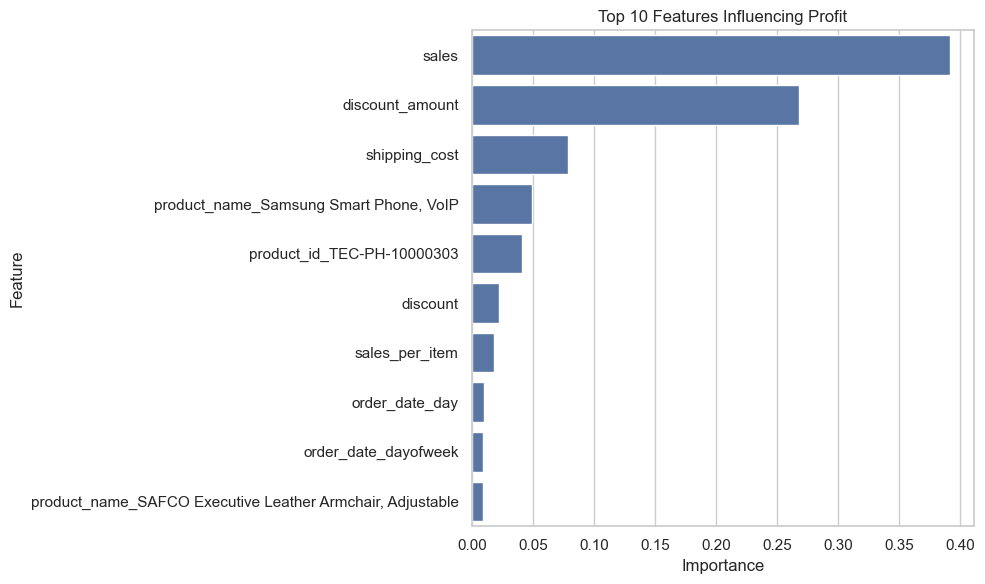

In [22]:
# Step 5: Feature importance (for Random Forest)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Features Influencing Profit')
plt.tight_layout()
plt.show()

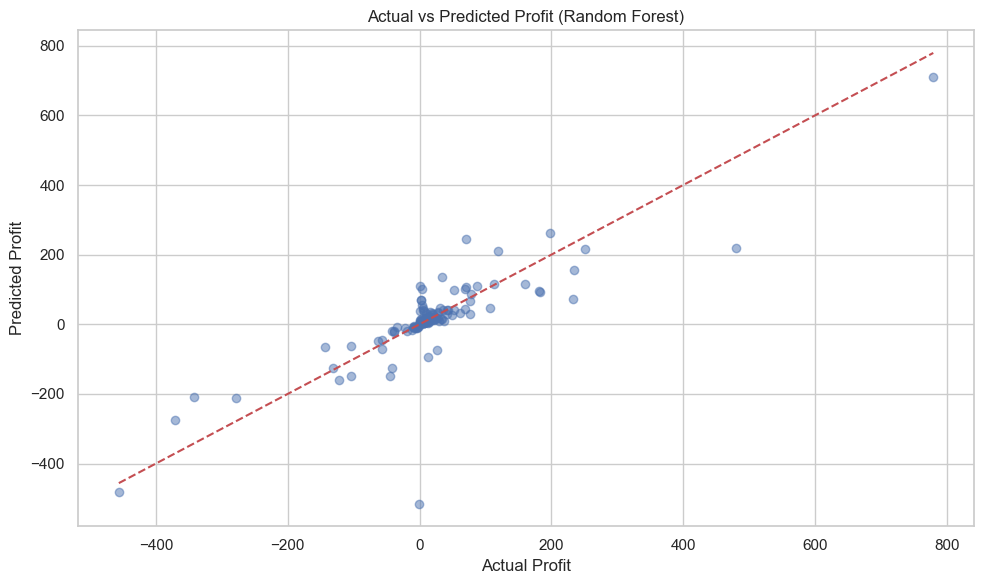

In [23]:
# Step 6: Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit (Random Forest)')
plt.tight_layout()
plt.show()